### Q.2. The neural network shown in Fig.1 has the following hyper parameters and input: Choose random weights and bias of the neuron and learning rate =0.01 and inputs to the neuron and target values are as follows.
<img src="Q2_table.png"> 

### (a).Write a python code for predicted the output of neural network for given set of inputs using Stochastic Gradient Descent algorithm for the loss functions: ((i) Mean Square Error  (ii)  Squared Epsilon Hinge Loss 
### (b)  Plot comparative loss curve 
### (c) repeat(a) and Adam optimization algorithm 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from losses import MSE, squaredEpsilonHingeLoss
plt.style.use("ggplot") 
%matplotlib inline 

In [2]:
X = np.array([[1, 4, 1], [1, 2, 8], [1, 1, 0], [1, 3, 2], [1, 1, 4], [1, 6, 7]])            #Added column of 1's to account for bias terms 
Y = np.array([2, -14, 1, -1, -7, -8]) 
Y = np.expand_dims(Y, -1) 

W = np.random.randn(3, 1) 
lr = 0.01

In [3]:
def init_params(shape):
    return {
        "S_dW" : np.zeros(shape), 
        "V_dW" : np.zeros(shape), 
        "beta_1" : 0.9, 
        "beta_2": 0.999, 
        "epsilon" : 10e-8 
    }

In [4]:
def SGD_MSE(X, Y, W, lr):
    n = len(X) 
    shuffle_n = np.random.permutation(n)
    dW = np.zeros(W.shape) 

    for i in shuffle_n: 
        x = np.expand_dims(X[i].copy(), -1)
        y_hat = x.T.dot(W)    
        dW = -x.dot(Y[i] - y_hat)*2/n 
        W -= lr*dW 

    J = MSE(Y, X.dot(W)) 
    # n = len(X) 
    return W, J 

def SGD_MSE_Adam(X, Y, W, adam_params, lr): 
    n = len(X)

    S_dW = adam_params["S_dW"]
    V_dW = adam_params["V_dW"] 
    beta_1 = adam_params["beta_1"]
    beta_2 = adam_params["beta_2"] 
    eps = adam_params["epsilon"] 

    shuffle_n = np.random.permutation(n) 
    dW = np.zeros(W.shape) 

    for i in shuffle_n: 
        x = np.expand_dims(X[i].copy(), -1) 
        y_hat = x.T.dot(W) 
        dW -= x.dot(Y[i] - y_hat)*2/n 

        V_dW = beta_1*V_dW + (1-beta_1)*dW 
        S_dW = beta_2*S_dW + (1-beta_2)*np.square(dW) 

        W -= lr*V_dW/(np.sqrt(S_dW) + eps) 

    Y_hat = X.dot(W) 
    J = MSE(Y, Y_hat)

    adam_params["S_dW"] = S_dW 
    adam_params["V_dW"] = V_dW

    return W, J, adam_params
    


# def SGD_SEHL(X, Y, W, lr): 
#     n = len(X) 
#     shuffle_n = np.random.permutation(n) 
#     dW = np.zeros(W.shape) 

#     for i in shuffle_n:
#         x = np.expand_dims(X[i].copy(), -1) 
#         y_hat = x.T.dot(W) 
#         dW = 

In [5]:
epochs = 500

W_sgd = np.random.randn(3, 1)
lossHist_sgd = [] 
weightHist_sgd = []
for epoch in range(epochs): 
    W_sgd, J= SGD_MSE(X, Y, W_sgd, lr) 
    lossHist_sgd.append(J) 
    weightHist_sgd.append(W_sgd.copy())


W_adam = np.random.randn(3, 1)
adam_params = init_params(W_adam.shape) 

lossHist_adam = []
weightHist_adam = [] 
for epoch in range(epochs):
    W_adam, j, adam_params = SGD_MSE_Adam(X, Y, W_adam, adam_params, lr) 
    lossHist_adam.append(j) 
    weightHist_adam.append(W_adam.copy())

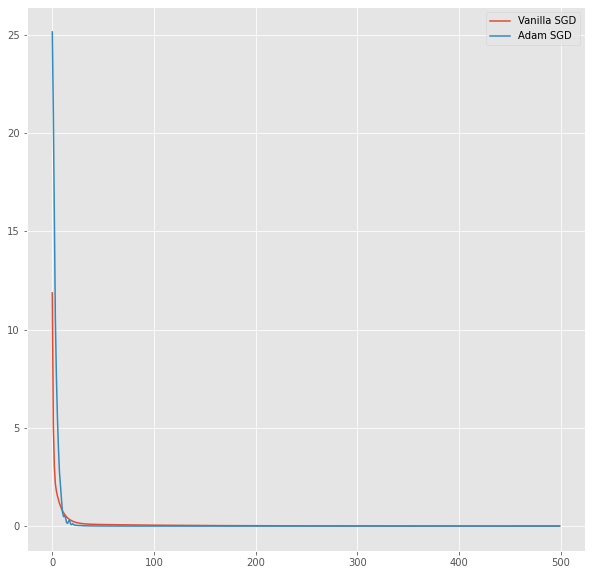

In [6]:
plt.figure(figsize = (10, 10))
plt.plot(lossHist_sgd, label = "Vanilla SGD")
plt.plot(lossHist_adam, label = "Adam SGD")
plt.legend()
plt.show()